# Using KModes on Toy dataset 

- https://github.com/nicodv/kmodes - kmodes implementation
- https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
data

,hair_color,eye_color,skin_color
person,,,
P1,blonde,amber,fair
P2,brunette,gray,brown
P3,red,green,brown
P4,black,hazel,brown
P5,brunette,amber,fair
P6,black,gray,brown
P7,red,green,fair
P8,black,hazel,fair


In [9]:
kmodesCost = []
num_Clusters = range(1, 5)
for k in num_Clusters:
    result = KModes(n_clusters = k, init='random', n_init = 5, verbose=0).fit(data)
    kmodesCost.append(result.cost_)

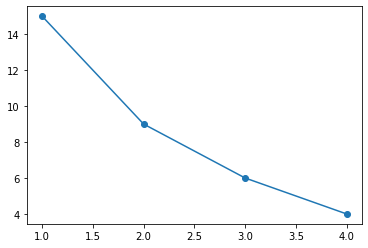

In [10]:
plt.plot(num_Clusters, kmodesCost, marker='o')

In [11]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 6.0
Run 4, iteration: 2/100, moves: 1, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 3


array([0, 2, 1, 2, 0, 2, 1, 0], dtype=uint16)

In [12]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,0,blonde,amber,fair
P2,2,brunette,gray,brown
P3,1,red,green,brown
P4,2,black,hazel,brown
P5,0,brunette,amber,fair
P6,2,black,gray,brown
P7,1,red,green,fair
P8,0,black,hazel,fair


In [13]:
data.sort_values(by='Cluster')

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,0,blonde,amber,fair
P5,0,brunette,amber,fair
P8,0,black,hazel,fair
P3,1,red,green,brown
P7,1,red,green,fair
P2,2,brunette,gray,brown
P4,2,black,hazel,brown
P6,2,black,gray,brown
